In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

## First loading the datasets

In [3]:
data = pd.read_csv('house_data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
data.columns.nunique()

9

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
## Now checking the null values
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
## Now seeing the area_type features
data.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [11]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

<AxesSubplot:>

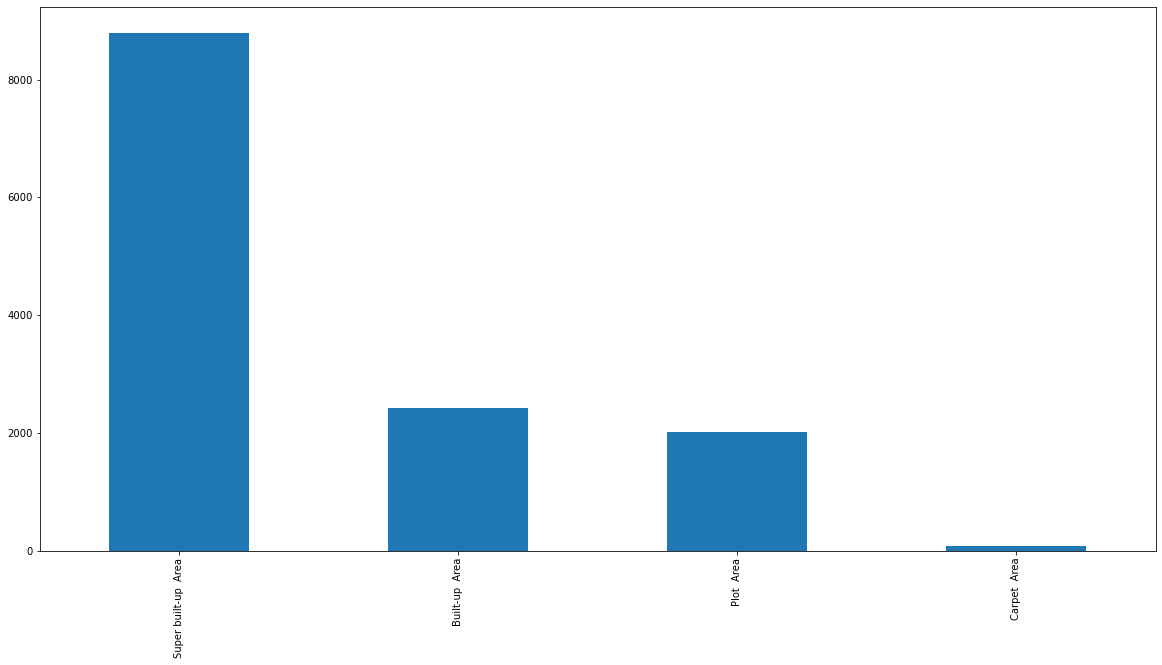

In [12]:
## Now visualizing the area_type features
data.area_type.value_counts().plot(kind='bar')

In [13]:
data.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [14]:
## Now checking for balcony columns
data.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [15]:
data.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

<AxesSubplot:>

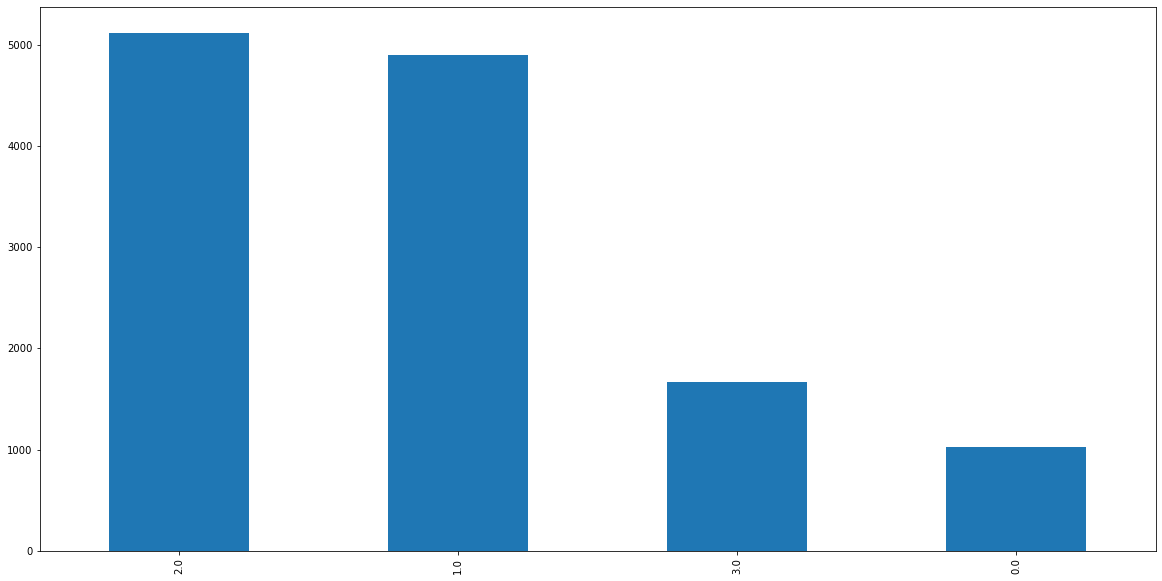

In [16]:
## Now visualizing the balcony features as well
data.balcony.value_counts().plot(kind='bar')

In [17]:
data.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [18]:
## Now checking the society columns
data.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [19]:
data.society.nunique()

2688

<AxesSubplot:>

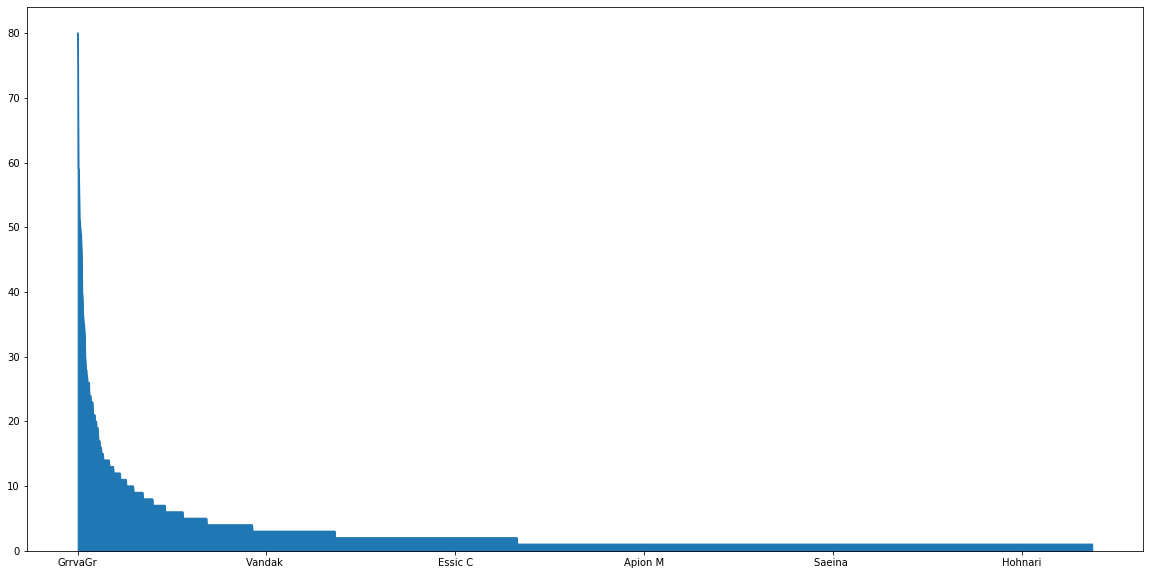

In [20]:
data.society.value_counts().plot(kind='area')

In [21]:
data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [22]:
## Removing un necessary data or features from the datasets
df = data.drop(['area_type', 'availability', 'society'],axis=1)
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [23]:
df.shape

(13320, 6)

In [24]:
## now checking ths null values
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

## Now Data cleaning process starts

In [25]:
data1 = df.dropna() ## Here removing all the null values fromt the datasets

In [26]:
data1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [27]:
data1.shape

(12710, 6)

## Feature Engineering Process


In [28]:
data1.head(2)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [29]:
## lets look at the size columns first and ana
data1.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [30]:
data1['size'].unique()  

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [31]:
data.size.unique() ## We will get error if we try to do this because the data in this columns are in space

AttributeError: 'numpy.int32' object has no attribute 'unique'

In [32]:
data1.bath.unique() ## It's fine

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [33]:
data1['size'].unique()  

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [34]:
## here we make seperate columns called bhk and put all the int values in it by applying the lambda functions

data1['bhk'] = data1['size'].apply(lambda x: int(x.split(' ')[0]))
data1.head()

<ipython-input-34-e9371b53ba6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['bhk'] = data1['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [35]:
## Now seeing the unique values in the bhk columns
data1.bhk.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [36]:
### Here from the above results theres the value 43 (means 43 bedrooms in a single house quit impossible) 
## Let's check it
data1[data1['bhk'] > 20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


Here looking for the total_sqft features

In [37]:
data1.total_sqft.value_counts()

1200      788
1100      218
1500      198
2400      177
600       172
         ... 
2283        1
1414        1
1139.7      1
2127        1
5           1
Name: total_sqft, Length: 1976, dtype: int64

In [38]:
data1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

SInce there are outliers like '1133 - 1384' values we have to perform operation like 1133 + 1384 / 2 to get the values

In [39]:
## Here writing the function to seperate the '1133 - 1384' types of values
def float_num(x):
    try:
        float(x)
    except:
        return False
    return True

In [40]:
float_num('112') ## FOr single value it returns True

True

In [41]:
float_num('112 - 112') ## Multiple values it returns False

False

In [42]:
data1[data1['total_sqft'].apply(float_num)].head(7) ## This functions print all the values that returns the True values

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25,3


In [43]:
data1[~data1['total_sqft'].apply(float_num)].head(10) ## While this code returns the values that return false from the above fn

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [44]:
### Now writing our main function to perform the operation like 2 + 2 / 2

def convert_func(x):
    values = x.split('-')
    if len(values) == 2:
        results = (float(values[0]) + float(values[1])) / 2
        return results 
    try:
        return float(x)
    except:
        None

In [45]:
convert_func('4')

4.0

In [46]:
convert_func('20 - 20')

20.0

In [47]:
(20 + 20) / 2

20.0

In [48]:
convert_func('100sq')
## According to function it returns none

In [49]:
data2 = data1.copy() ## Goods practice
data2.head(3)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3


In [50]:
## Now applying the function  we wrote in the original data
data2['total_sqft'] = data1['total_sqft'].apply(convert_func)

In [51]:
## checking whether hte function works properly or not
data2.dtypes.total_sqft

dtype('float64')

In [52]:
data2.total_sqft[30]

2475.0

In [53]:
(2100 + 2850) / 2
## Since it Matches

2475.0

In [54]:
data2.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
balcony             0
price            18.5
bhk                 1
Name: 410, dtype: object

In [55]:
data2.isnull().sum()

location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [56]:
data2.shape

(12710, 7)

In [57]:
data3 = data2.dropna()

In [58]:
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [59]:
data3.shape

(12668, 7)

In [60]:
### Now lets explore the data more
## suppose if we want to know the price per sqft then we can do the simple maths operations like
## Example 1030sqft = 2567890 lakhs then 1sqft = 2567890/1030 = (The answers)
## For that we have to make a new columns

data3['price_per_sqft'] = data3['price'] * 100000 / data3['total_sqft'] ## Since the price is in lakh we multiply by 1 lakh)
data3.head()
    


<ipython-input-60-63584eb78169>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['price_per_sqft'] = data3['price'] * 100000 / data3['total_sqft'] ## Since the price is in lakh we multiply by 1 lakh)


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


Now let's looks for the categorical data i.e. Location column

In [61]:
data3.shape

(12668, 8)

In [62]:
data3.location.nunique()

1259

In [63]:
## Now using the concept of dimensionality reduction technique as there are 1259 unique values and if we include all
# then we have 1259 dummies or extra columns
data3.location = data3.location.apply(lambda x : x.strip()) ## It removesd the whitespace if there are any
location_info = data3['location'].value_counts(ascending=True)
location_info

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Bull Temple Road            1
Kannur                      1
Kanakapura Road,            1
Yelahanka,MVIT college      1
SHANTHINAGAR                1
                         ... 
Thanisandra               233
Kanakpura Road            259
Electronic City           302
Sarjapur  Road            372
Whitefield                514
Name: location, Length: 1248, dtype: int64

In [64]:
## We check the total number of values in the location less than or equal to 10
location_less_than_10 = location_info[location_info<=10]
len(location_less_than_10)

1013

In [65]:
len(location_info[location_info>10])

235

In [66]:
## The above result we will kept in the new ('Other') row in Location columns
data3.location = data3['location'].apply(lambda x: 'other' if x in location_less_than_10 else x) 
## the above function does is it create the new row Other and pt all the values that is less than 10 and other remains same
len(data3['location'].unique())

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


236

In [67]:
data3.location.nunique()

236

In [68]:
data3.location.value_counts()

other                 2741
Whitefield             514
Sarjapur  Road         372
Electronic City        302
Kanakpura Road         259
                      ... 
Marsur                  11
Bommenahalli            11
Pattandur Agrahara      11
ISRO Layout             11
Prithvi Layout          11
Name: location, Length: 236, dtype: int64

In [69]:
data3.shape

(12668, 8)

Here we try to remove more values considering the hypothesis that square ft per bedroom is 300 like if there are 2 bhk or
 two bedrooms then the apartment or building is minimum 600 sqft if the values comes less than 300 then it denotes the outlier
 wheres if the values is above threshold then it's ok

In [70]:
data3[data3.total_sqft / data3.bhk < 300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [71]:
1407/6
## Here the values is less than our threshold so we consider as a outliers

234.5

In [72]:
data3[~(data3.total_sqft / data3.bhk < 300)].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [73]:
1056/2
## Greater than 300 according to uor assumption

528.0

In [74]:
data3.shape
## Before remoiving outliers the shape of data

(12668, 8)

In [75]:
data4 = data3[~(data3.total_sqft / data3.bhk < 300)]
data4.shape

(12013, 8)

In [76]:
12668 - 12013
## Here we remove about 655 outliers from the data

655

Now looking for the price per sqft

In [77]:
data4.price_per_sqft.describe()
## Here if we see the maximum price per sqft then the values is way more greater though it might be true 
# Here we want to built the generic model so we will remove such kind of values and build a generic model

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [78]:
hero = data4.groupby('location')
hero.first()

,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
location,,,,,,,
1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.00,4,15017.543860
1st Phase JP Nagar,4 BHK,2825.0,4.0,3.0,250.00,4,8849.557522
2nd Phase Judicial Layout,3 BHK,1450.0,2.0,1.0,50.75,3,3500.000000
2nd Stage Nagarbhavi,4 Bedroom,1500.0,4.0,2.0,220.00,4,14666.666667
5th Phase JP Nagar,2 BHK,1075.0,2.0,2.0,60.00,2,5581.395349
...,...,...,...,...,...,...,...
Yelahanka,4 BHK,2475.0,4.0,0.0,186.00,4,7515.151515
Yelahanka New Town,1 BHK,650.0,1.0,2.0,33.00,1,5076.923077
Yelenahalli,2 BHK,1240.0,2.0,2.0,47.12,2,3800.000000


In [79]:
## Here wriiting the function to remove the outliers according to the location columns
def remove_price_per_sqft_outliers(df):
    new_df = pd.DataFrame()
    for index, value in df.groupby('location'):
        mean = np.mean(value.price_per_sqft)
        stand_dev = np.std(value.price_per_sqft)
        condition = value[(value.price_per_sqft>(mean-stand_dev)) & (value.price_per_sqft<=(mean+stand_dev))]
        new_df = pd.concat([new_df,condition],ignore_index=True)
    return new_df




In [80]:
data5 = remove_price_per_sqft_outliers(data4)
data5.shape
## Here from the results we see that the size decreases than the original values

(9852, 8)

In [81]:
12013 - 9852
## Here we remove about 2161 values by normalizing the data

2161

Here we check for the outliers like the houses having 2 bedrooms price is more than the 3 bedrooms price having the same sqft <br>
For this we visualize the data using the scatter plot

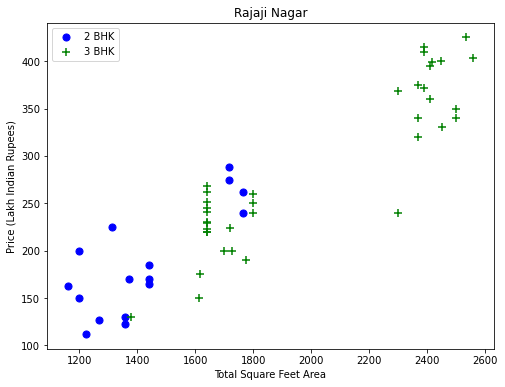

In [82]:
### Now Visualizing the data to find the outliers like: 

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data5,"Rajaji Nagar")

From the above figure we can see that between 1200 and 1400 there's seems one outliers like having the same sqft(area) the price of 2 bedrooms is higher than the 3 bedrooms as well between 1600 and 1800 there are the same outliers

In [83]:
data5.bhk.value_counts()

2     4698
3     3829
4      641
1      515
5       84
6       49
7       16
8       13
9        5
13       1
11       1
Name: bhk, dtype: int64

In [84]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data6 = remove_bhk_outliers(data5)
# df8 = df7.copy()
data6.shape

(7014, 8)

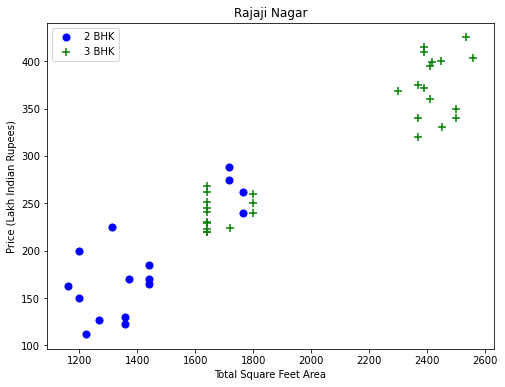

In [85]:
plot_scatter_chart(data6,"Rajaji Nagar")

Here from the above figure and comparing the previopus figure we remove the outliers

In [86]:
data5.shape

(9852, 8)

In [87]:
data6.shape

(7014, 8)

In [88]:
9852 - 7014
## Here we remove about 2838 values(outliers)

2838

Now let's check how are data is classified for this let's check the price_per_sqft in visualization to where data are placed


Text(0, 0.5, 'counts')

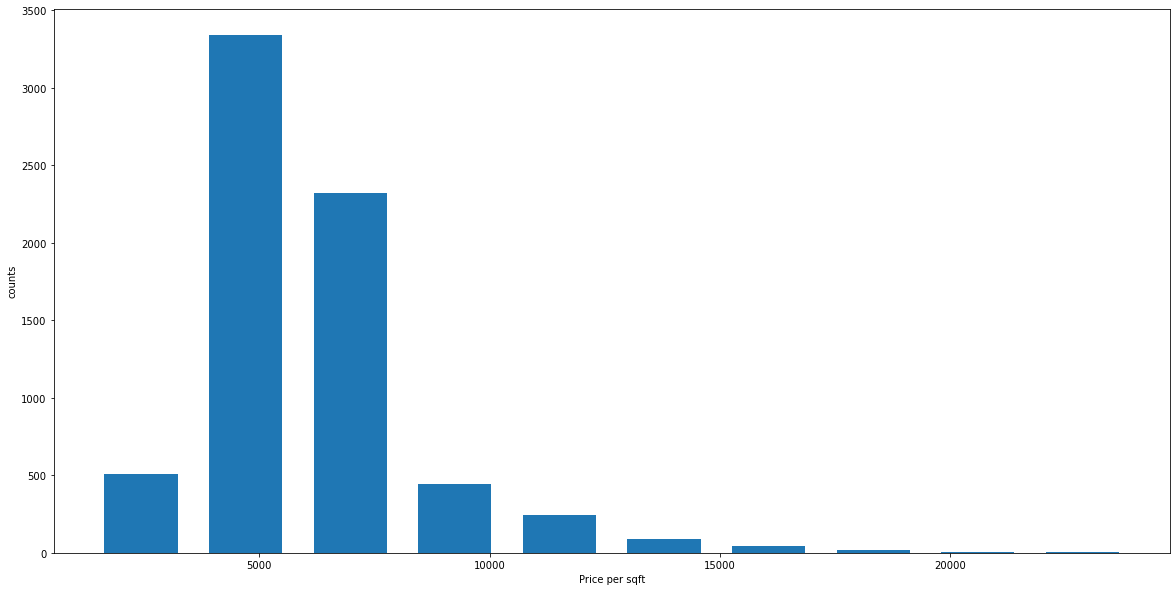

In [89]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data6.price_per_sqft, bins=None, rwidth=0.7)
plt.xlabel('Price per sqft')
plt.ylabel('counts')

In [90]:
data6.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


Lets look for the baths columns


In [91]:
data6.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

<AxesSubplot:>

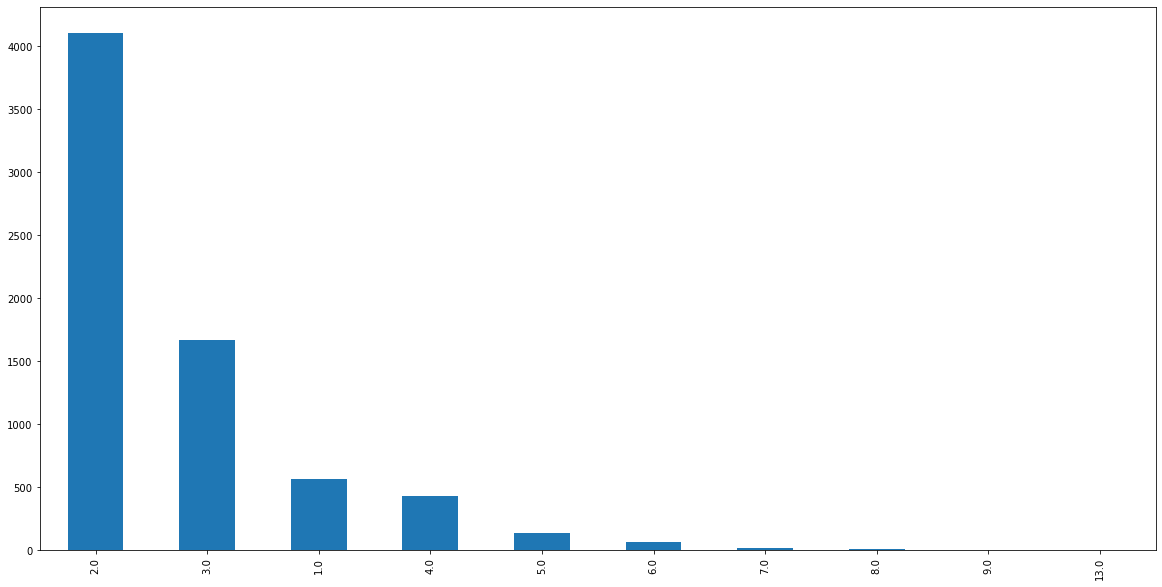

In [92]:
data6.bath.value_counts().plot(kind='bar')

In [93]:
## Assuming that it is un usual to have 2 or more than 2 bathrooms  than a number of bedroom(flat) in a house
data6[data6.bath > data6.bhk + 2].head() ## This are outliers

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6443,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8082,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [94]:
## SO taking the real value
data7 = data6[data6.bath < data6.bhk + 2]
data7.shape

(6947, 8)

## For Balcony

Text(0, 0.5, 'Balcony')

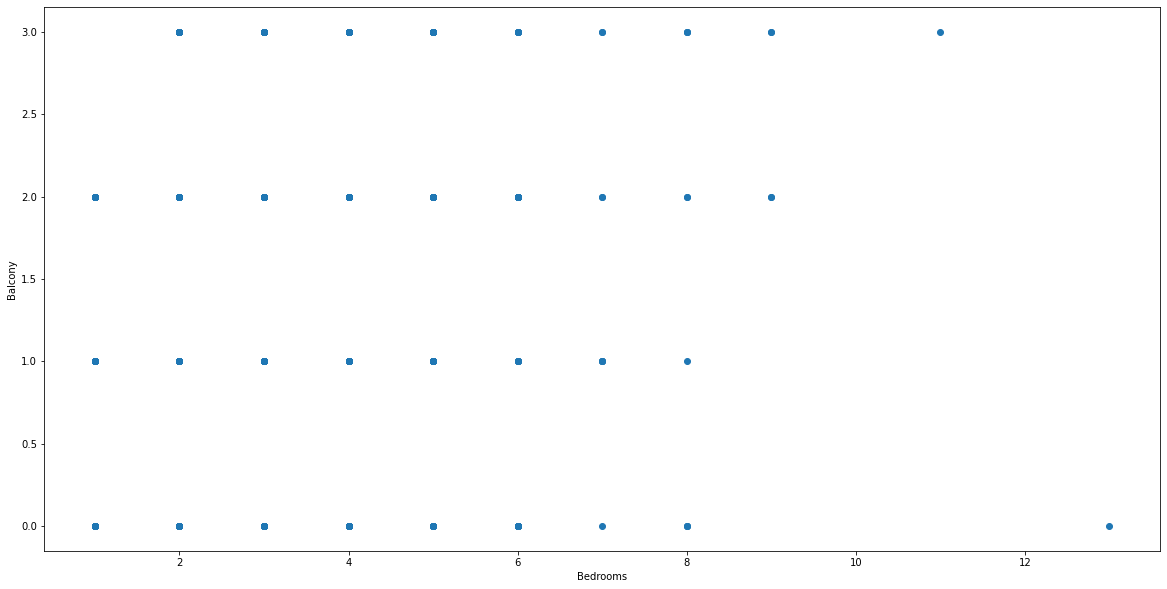

In [95]:
plt.scatter(data7.bhk,data7.balcony)
plt.xlabel('Bedrooms')
plt.ylabel('Balcony')

From the figure we see that (In 2 bedrooms some data has 0 balcony 1 balcony and 2, 3 balcony) Seems ok considering the real scenario

Now droping the un necessary columns

In [96]:
data7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [97]:
data8 = data7.drop(['size','price_per_sqft'],axis=1)
data8.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [98]:
data8.shape

(6947, 6)

## Now DOing one hot encoding

In [99]:
data8.location.nunique()

236

In [100]:
data8.location.value_counts()

other                    1075
Whitefield                230
Sarjapur  Road            179
Electronic City           162
Raja Rajeshwari Nagar     138
                         ... 
Banjara Layout              4
Nagasandra                  4
Vishwapriya Layout          4
Vishveshwarya Layout        3
Marsur                      3
Name: location, Length: 236, dtype: int64

In [101]:
dummies = pd.get_dummies(data8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
## Now to aviod the dummines trap we can remove one of the columns like of we remove 1st Block Jayanagar then if it present
# then all other columns remains 0 and since reflect the original column 1st block jayanagar
data9 = pd.concat([data8,dummies.drop('other',axis=1)], axis=1)
data9.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
## Now at last dropping the location columns
data10 = data9.drop('location',axis=1)
data10.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
data10.shape

(6947, 240)

## Now comes the model Building part

In [105]:
data10.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X = data10.drop('price',axis=1)
y = data10.price

In [107]:
X.shape

(6947, 239)

In [108]:
y.shape

(6947,)

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [260]:
## Here first training with the Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_test,y_test)

0.8725663387714268

In [261]:
print(X_train.shape)
print(y_train.shape)

(5557, 239)
(5557,)


In [262]:
print(X_test.shape)
print(y_test.shape)

(1390, 239)
(1390,)


## Using K Fold cross validaiton to check linear regression model 

In [263]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=7, test_size=0.2, random_state=5)
cross_val_score(LinearRegression(),X, y, cv=cv)

array([0.87256634, 0.86123816, 0.74383959, 0.87104016, 0.7961004 ,
       0.87479362, 0.85413135])

## Here we can see that we are getting above 80% accuracy each time
 Now let's check other algorithms

In [264]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.845123,{'normalize': True}
1,lasso,0.683872,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.708421,"{'criterion': 'mse', 'splitter': 'random'}"


In [265]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=239)

In [266]:
loc_index = np.where(X.columns=='1st Phase JP Nagar')[0][0]
loc_index

5

In [271]:
def predict_price(location,sqft,bath,balcony,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return linreg.predict([x])[0]

In [272]:
predict_price('1st Phase JP Nagar',1000, 3, 3, 3)

85.00752236215673

In [275]:
predict_price('1st Phase JP Nagar',1000, 2, 2, 2)

84.96199424027706

In [277]:
predict_price('1st Phase JP Nagar',1000, 2, 1, 3)

85.71888325886542

In [270]:
predict_price('Indira Nagar',1000, 2, 2, 2)

169.25962413336543